In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/dataset.CSV", sep=";")

In [3]:
df.head(10)

,female_id,male_id,date,female_grade,anal,oral,kiss
0,0,1,0,0,0,0,0
1,2,1,0,1,-1,1,-1
2,3,1,0,0,0,0,0
3,0,4,21,0,0,0,0
4,5,6,47,0,0,0,0
5,5,6,73,0,0,0,0
6,7,8,105,0,0,0,0
7,9,10,121,0,0,0,0
8,11,12,124,1,0,0,0
9,13,12,126,1,0,0,0


In [4]:
df.isnull().mean()

female_id       0.0
male_id         0.0
date            0.0
female_grade    0.0
anal            0.0
oral            0.0
kiss            0.0
dtype: float64

### No missing values!

In [5]:
df.shape

(50632, 7)

In [16]:
print("Size of the graph (nb of edges) : ",df.shape[0])

Size of the graph (nb of edges) :  50632


### 50 623 different sexual contacts

In [6]:
print("Number of escort :", len(df["female_id"].unique()))

Number of escort : 6624


In [8]:
print("Number of clients : ",len(df["male_id"].unique()))

Number of clients :  10106


In [15]:
print("Order of the graph : ",len(df["male_id"].unique())+len(df["female_id"].unique()))

Order of the graph :  16730


Our graph has vertex ("buyer"/"escort") and edge (grades) attributes.

In [18]:
for col_name in ["female_grade", "anal", "oral", "kiss"]:
    print(col_name, np.unique(df[col_name]))

female_grade [-1  0  1]
anal [-1  0  1]
oral [-1  0  1]
kiss [-1  0  1]


Each time, three possibilities for the female grade : -1, 0 or 1. -1 means "bad", 0 means "neutral", and 1 means "good". On the contrary, for "anal", "oral" and "kiss", +1 means that the sexual practice in question has been performed, -1 that it hasn't, and 0 means that no information is available.

We see that the female grade mean is 0.74, which means that a lot of escorts in the dataset have been highly rated during the period. However, the standard error is also pretty high.

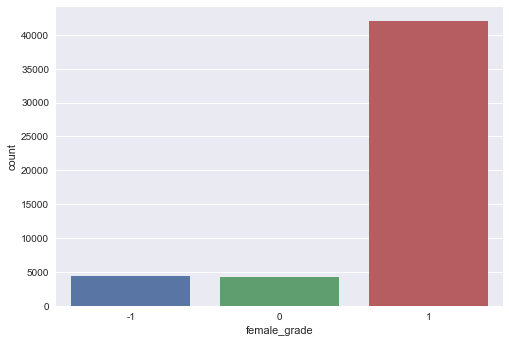

In [28]:
# distribution of general grade variable
sns.countplot("female_grade", data = df)
plt.show()

To account for the fact that the zeros mean that the information is not available for these three variables, we describe them without the 0.

In [21]:
df["anal"][df.anal != 0].describe()

count    38392.000000
mean         0.396645
std          0.917984
min         -1.000000
25%         -1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: anal, dtype: float64

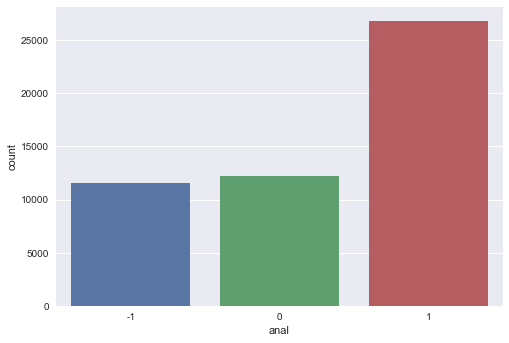

In [25]:
# distribution of "anal" variable
sns.countplot("anal", data = df)
plt.show()

In [23]:
df["oral"][df.oral != 0].describe()

count    46974.000000
mean         0.716992
std          0.697088
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: oral, dtype: float64

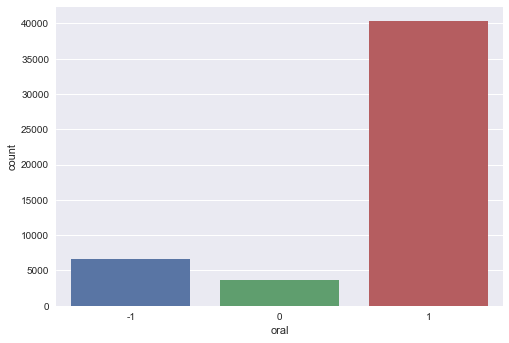

In [26]:
# distribution of "oral" variable
sns.countplot("oral", data = df)
plt.show()

In [24]:
df["kiss"][df.kiss != 0].describe()

count    44672.000000
mean         0.714004
std          0.700149
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: kiss, dtype: float64

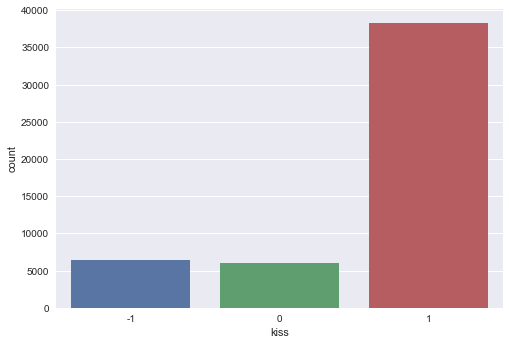

In [27]:
# distribution of "kiss" variable
sns.countplot("kiss", data = df)
plt.show()

Oral and kiss practices are also pretty highly rated, and practically with the same mean and standard-error than the overall grade. It would be interesting to check if there are correlations between these variables. This is confirmed by the distribution of the grades (more than 75% of the escorts have been rated 1 for their overall service, the oral or the kiss practice). Anal practices are more poorly rated; indeed, the mean is equal to 0.4, and with a higher dispersion of the values (0.9). For this variable, between 25% and 50% of the contacts "only" have been rated 1.

### Correlation between the edge attributes

In [30]:
pd.crosstab(df.kiss, df.oral)

oral,-1,0,1
kiss,,,
-1,3149,104,3135
0,0,3074,2886
1,3498,480,34306


In [ ]:
# TODO

### It is interesting to note that id are not sequential :
- 6624 escort and female_id ranges from 0 to 16728
- 10106 clients and male_id ranges from 0 to 16729

### Female repartition

In [31]:
groupby_female = df.groupby("female_id").count()
groupby_female.sample(10)

,male_id,date,female_grade,anal,oral,kiss
female_id,,,,,,
11021,2,2,2,2,2,2
6458,3,3,3,3,3,3
2889,12,12,12,12,12,12
1847,5,5,5,5,5,5
4156,3,3,3,3,3,3
11157,3,3,3,3,3,3
14480,13,13,13,13,13,13
8875,1,1,1,1,1,1
16320,1,1,1,1,1,1


In [32]:
mean_contact_women = np.mean(groupby_female["male_id"])
print("Mean number of contact per escort :",mean_contact_women)

Mean number of contact per escort : 7.64371980676


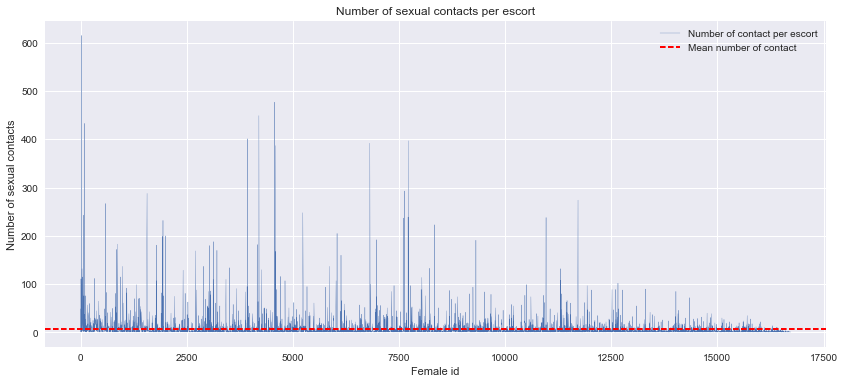

In [33]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per escort")
plt.plot(groupby_female["male_id"], label="Number of contact per escort", linewidth=.3)
plt.xlabel("Female id")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_women, xmin=0, xmax=18000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contact")
plt.legend()
plt.show()

TODO : find a way to plot in a nicer way the distribution of the sexual contacts by escort/buyer.

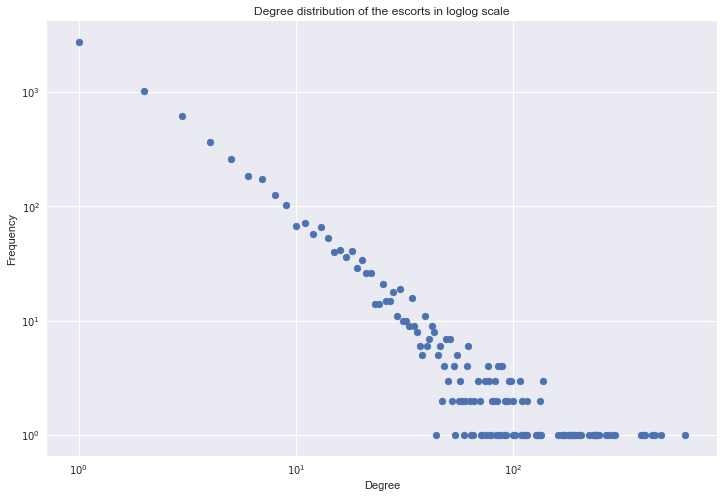

In [51]:
escort_degrees = df.groupby(by = ["female_id"]).count().groupby(by = "female_grade").count()
plt.figure(figsize=(12,8))
plt.xscale("log")
plt.yscale("log")
plt.scatter(escort_degrees.index, escort_degrees.kiss)
plt.title("Degree distribution of the escorts in loglog scale")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

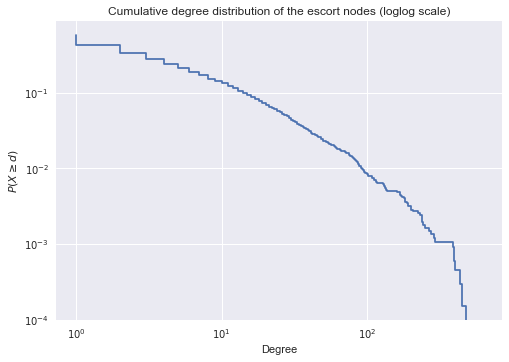

In [92]:
plt.step(escort_degrees.index,(1 - (escort_degrees.male_id.cumsum() / 6624)))
plt.xscale('log')
plt.yscale('log')
plt.title("Cumulative degree distribution of the escort nodes (loglog scale)")
plt.xlabel("Degree")
plt.ylabel("$P(X \geq d)$")
plt.show()

### Male repartition

In [53]:
groupby_male = df.groupby("male_id").count()
groupby_male.sample(10)

,female_id,date,female_grade,anal,oral,kiss
male_id,,,,,,
4507,1,1,1,1,1,1
12201,1,1,1,1,1,1
748,1,1,1,1,1,1
1789,1,1,1,1,1,1
15459,2,2,2,2,2,2
14608,2,2,2,2,2,2
6471,2,2,2,2,2,2
6779,1,1,1,1,1,1
13739,3,3,3,3,3,3


In [55]:
mean_contact_men = np.mean(groupby_male["female_id"])
print("Mean number of contacts per client :",mean_contact_men)

Mean number of contacts per client : 5.01009301405


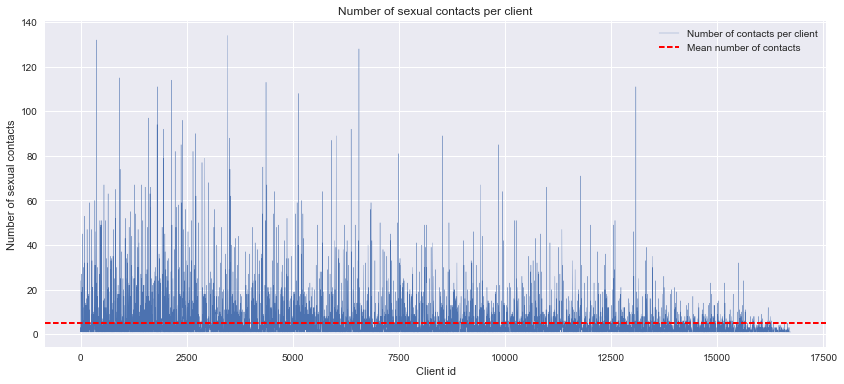

In [56]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per client")
plt.plot(groupby_male.index, groupby_male["female_id"], label="Number of contacts per client", linewidth=.3)
plt.xlabel("Client id")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_men, xmin=0, xmax=18000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts")
plt.legend()
plt.show()

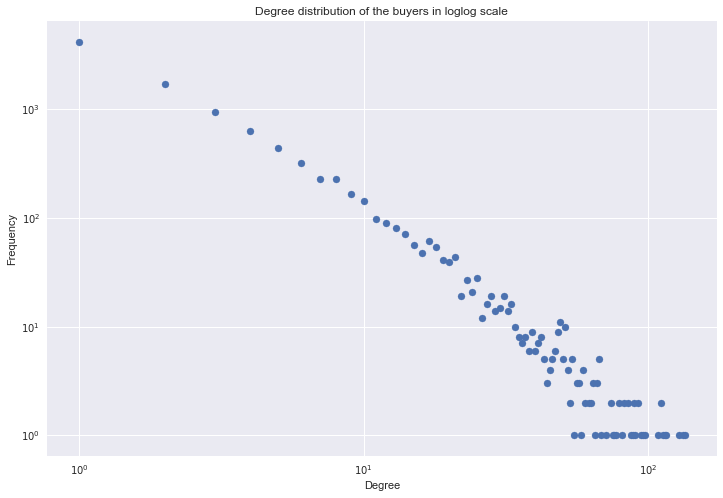

In [57]:
buyer_degrees = df.groupby(by = ["male_id"]).count().groupby(by = "female_grade").count()
plt.figure(figsize=(12,8))
plt.xscale("log")
plt.yscale("log")
plt.scatter(buyer_degrees.index, buyer_degrees.kiss)
plt.title("Degree distribution of the buyers in loglog scale")
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.show()

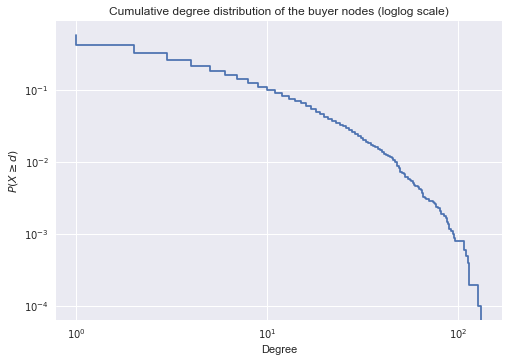

In [87]:
plt.step(buyer_degrees.index,(1 - (buyer_degrees.female_id.cumsum() / 10106)))
plt.xscale('log')
plt.yscale('log')
plt.title("Cumulative degree distribution of the buyer nodes (loglog scale)")
plt.xlabel("Degree")
plt.ylabel("$P(X \geq d)$")
plt.show()

### Temporal distribution

In [96]:
groupby_date = df.groupby("date").count()
groupby_date.sample(10)

,female_id,male_id,female_grade,anal,oral,kiss
date,,,,,,
1781,31,31,31,31,31,31
840,14,14,14,14,14,14
383,2,2,2,2,2,2
797,17,17,17,17,17,17
1844,63,63,63,63,63,63
1223,41,41,41,41,41,41
1023,10,10,10,10,10,10
1895,45,45,45,45,45,45
1376,38,38,38,38,38,38


In [97]:
groupby_date_mean = df.groupby("date").mean()
groupby_date_mean.sample(10)

,female_id,male_id,female_grade,anal,oral,kiss
date,,,,,,
367,100.400000,157.800000,0.800000,0.400000,0.400000,0.400000
379,48.000000,186.000000,-1.000000,0.000000,0.000000,0.000000
1023,2445.800000,2974.600000,0.500000,0.200000,0.800000,0.500000
1378,4990.755556,6008.644444,0.444444,0.066667,0.511111,0.400000
1523,5897.928571,5816.392857,0.839286,0.285714,0.642857,0.625000
2166,11137.978261,10889.217391,0.717391,0.000000,0.847826,0.826087
1653,7763.857143,6467.000000,0.642857,0.642857,0.785714,0.785714
1986,9613.244444,9427.822222,0.911111,0.377778,0.822222,0.822222
2118,11689.826923,10418.653846,0.730769,0.326923,0.750000,0.711538


In [98]:
mean_anal_date = np.mean(groupby_date_mean["anal"])
mean_oral_date = np.mean(groupby_date_mean["oral"])
mean_kiss_date = np.mean(groupby_date_mean["kiss"])
mean_overall_date = np.mean(groupby_date_mean["female_grade"])

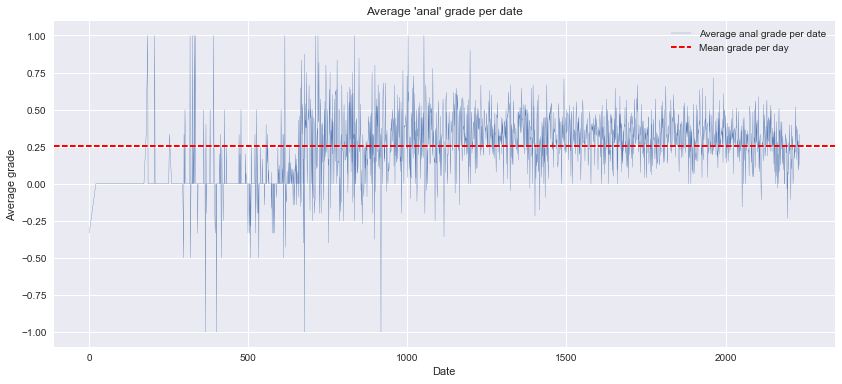

In [99]:
plt.figure(figsize=(14,6))
plt.title("Average 'anal' grade per date")
plt.plot(groupby_date.index, groupby_date_mean["anal"], label="Average anal grade per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Average grade")

plt.axhline(y=mean_anal_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean grade per day")
plt.legend()
plt.show()

A lot of volatility at first, but this is due to the low number of contacts in the beginning. The grades are stabilizing after 1000 days.

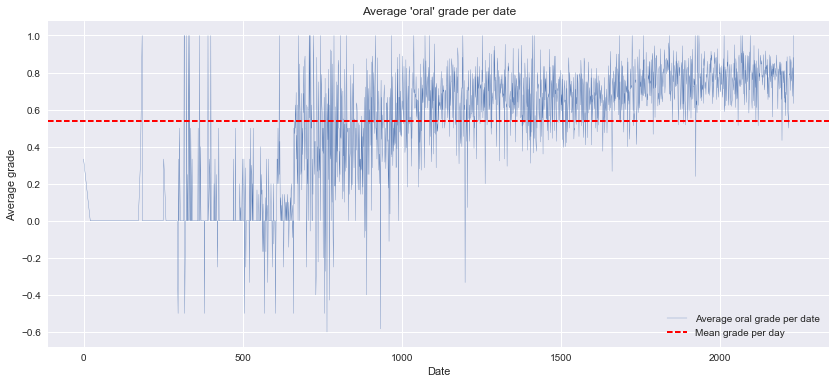

In [100]:
plt.figure(figsize=(14,6))
plt.title("Average 'oral' grade per date")
plt.plot(groupby_date.index, groupby_date_mean["oral"], label="Average oral grade per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Average grade")

plt.axhline(y=mean_oral_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean grade per day")
plt.legend()
plt.show()

Same here, but we can see a growing trend in the grades.

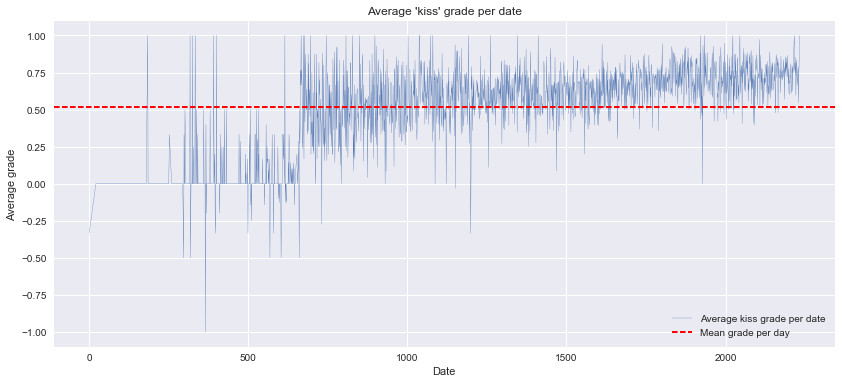

In [101]:
plt.figure(figsize=(14,6))
plt.title("Average 'kiss' grade per date")
plt.plot(groupby_date.index, groupby_date_mean["kiss"], label="Average kiss grade per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Average grade")

plt.axhline(y=mean_kiss_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean grade per day")
plt.legend()
plt.show()

We can observe the same trend here.

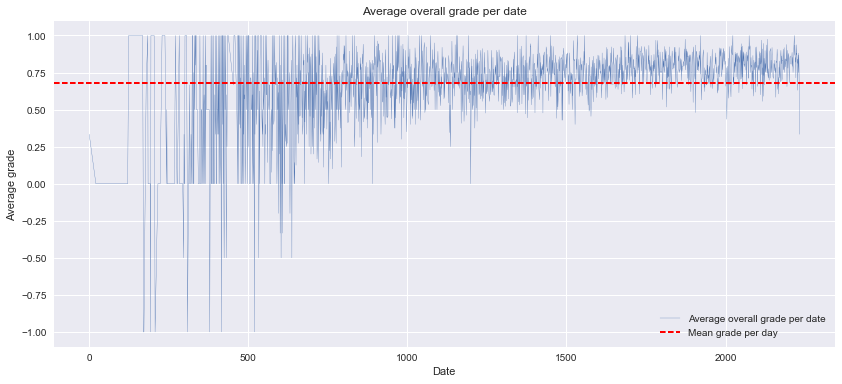

In [102]:
plt.figure(figsize=(14,6))
plt.title("Average overall grade per date")
plt.plot(groupby_date.index, groupby_date_mean["female_grade"], label="Average overall grade per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Average grade")

plt.axhline(y=mean_overall_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean grade per day")
plt.legend()
plt.show()

Idem.

In [103]:
mean_contact_date = np.mean(groupby_date["female_id"])
print("Mean number of contact per date :",mean_contact_date)

Mean number of contact per date : 26.4396866841


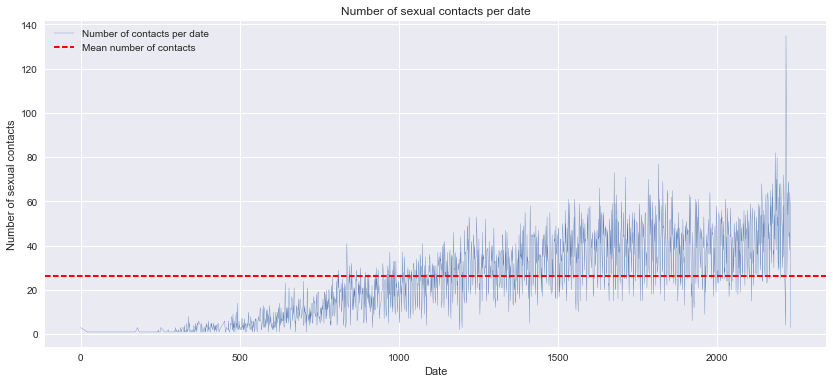

In [104]:
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(groupby_date.index, groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts")
plt.legend()
plt.show()

### We can observe that the number of contact per day is clearly growing with time, it may be due to the growing popularity of the forum where the data was collected

### Therefore we would do our analysis only after approx 1000 days to have the network stabilized.

The date variable is an integer, consisting in the number of days after which the data has begun to be collected.

### Lets look at the data in a 500 days window

### Here is the contact from day 500 till day 1000

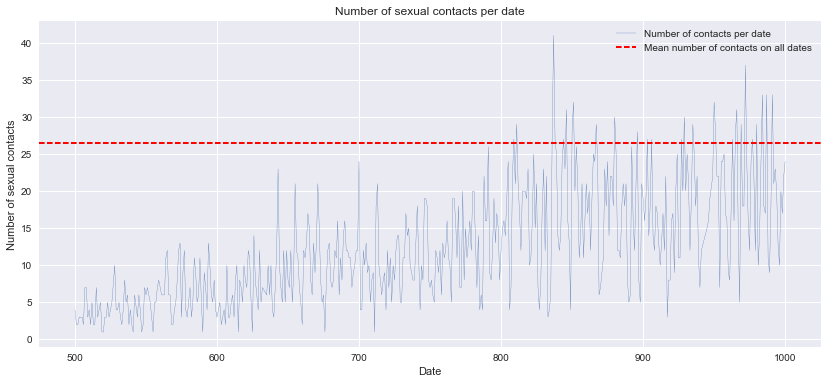

In [105]:
window_groupby_date = groupby_date.loc[500:1000]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts on all dates")
plt.legend()
plt.show()


### Here is the contact from day 1000 till day 1500

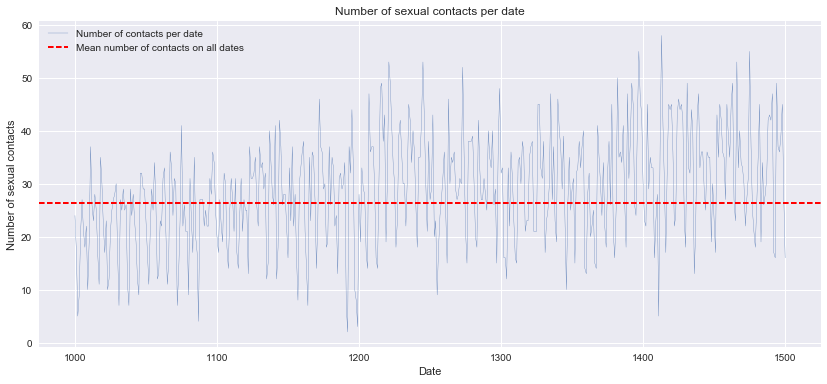

In [106]:
window_groupby_date = groupby_date.loc[1000:1500]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts on all dates")
plt.legend()
plt.show()

### Here is the contact from day 1500 till day 2000

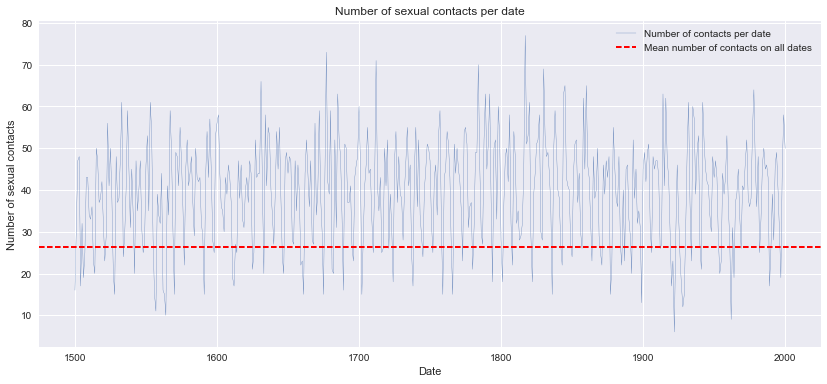

In [107]:
window_groupby_date = groupby_date.loc[1500:2000]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts on all dates")
plt.legend()
plt.show()

### Here is the contact from day 2000 till end

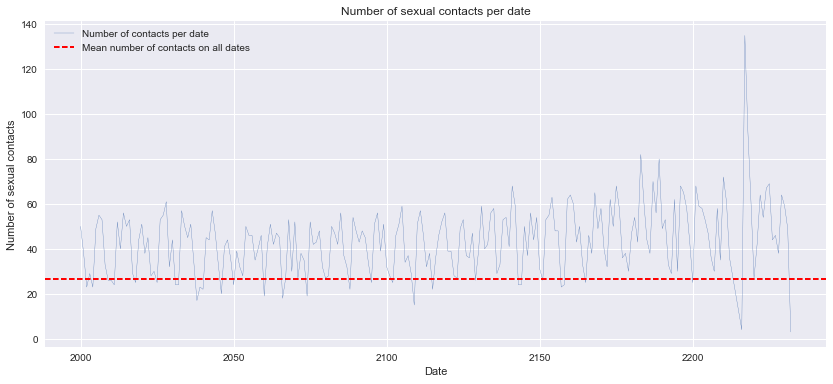

In [108]:
window_groupby_date = groupby_date.loc[2000:2500]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts on all dates")
plt.legend()
plt.show()

Is there a seasonality in the data?

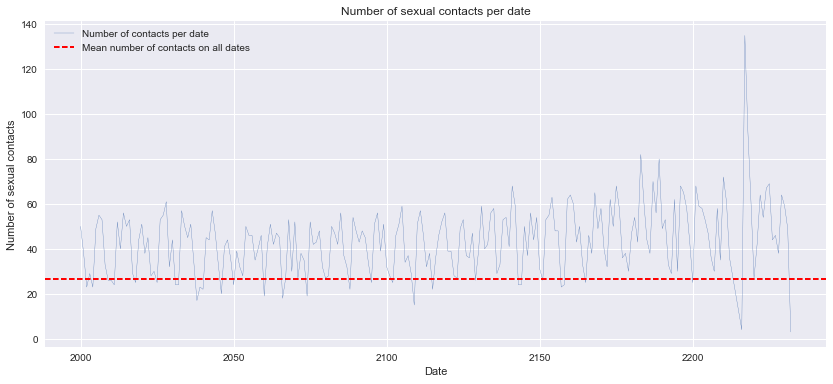

In [109]:
window_groupby_date = groupby_date.loc[2000:2356]
plt.figure(figsize=(14,6))
plt.title("Number of sexual contacts per date")
plt.plot(window_groupby_date.index, window_groupby_date["female_id"], label="Number of contacts per date", linewidth=.3)
plt.xlabel("Date")
plt.ylabel("Number of sexual contacts")

plt.axhline(y=mean_contact_date, xmin=0, xmax=3000, linewidth=2, linestyle="dashed",color = 'r', label="Mean number of contacts on all dates")
plt.legend()
plt.show()

Indeed, there seem to be a seasonality in the data.

### Will there be multiple edges in the graph ?

In [110]:
multigroupby = df.groupby(["female_id","male_id"]).count()["date"]

### Percentage of number of sex contact between clients and escort

In [111]:
((multigroupby.value_counts()/df.shape[0])*100).sort_values(ascending=False)

1     66.288118
2      6.612419
3      2.010586
4      0.827540
5      0.485859
6      0.242929
7      0.159978
8      0.106652
9      0.080976
10     0.073076
11     0.039501
12     0.029626
13     0.027650
19     0.021725
18     0.019750
14     0.013825
15     0.011850
17     0.007900
24     0.005925
27     0.005925
21     0.005925
30     0.003950
20     0.003950
16     0.003950
23     0.003950
41     0.001975
39     0.001975
22     0.001975
25     0.001975
36     0.001975
26     0.001975
34     0.001975
29     0.001975
33     0.001975
31     0.001975
Name: date, dtype: float64

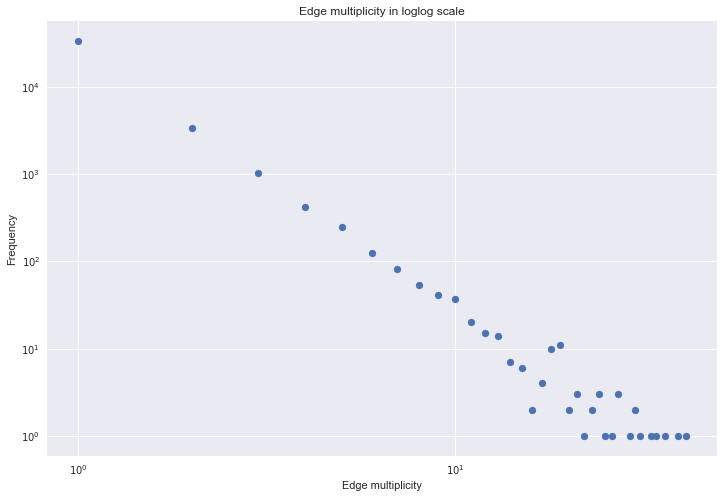

In [112]:
edge_mult = df.groupby(by = ["female_id","male_id"]).count().groupby(by = "female_grade").count()
plt.figure(figsize=(12,8))
plt.scatter(edge_mult.index, edge_mult.kiss)
plt.xscale("log")
plt.yscale("log")
plt.title("Edge multiplicity in loglog scale")
plt.ylabel("Frequency")
plt.xlabel("Edge multiplicity")
#plt.scatter(edge_mult.index, edge_mult.anal)
plt.show()

- Majority of contacts are one time (66%)
- 6.6% two times
- 2% three times
- more is less than 1%
